# Деревья решений. Настройка дополнительных параметров

Загрузим ранее подготовленные данные датасета "Титаник"

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

titanic_data = pd.read_csv('./data/titanic/train.csv')
titanic_data.head()

X = pd.read_pickle('./data/titanic/train_x.pkl')
y = pd.read_pickle('./data/titanic/train_y.pkl')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Обучим дерево решений

In [2]:
import sklearn.tree as tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Выведем дерево решений

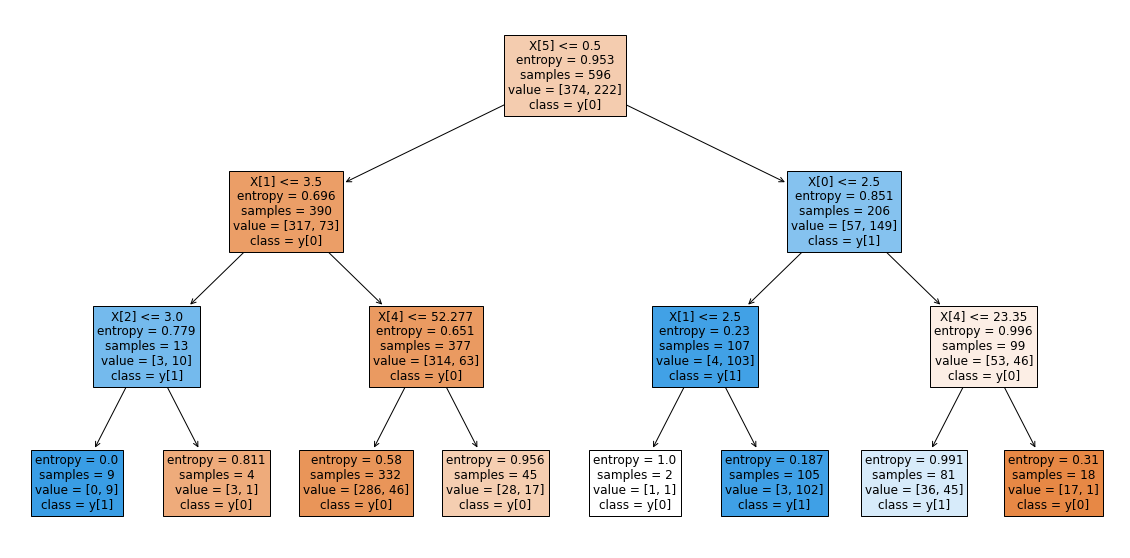

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, fontsize=12, class_names=True)
plt.show()

### Добавим другие параметры в дерево решений:
* min_samples_split - минимальное число образцов в узле, чтобы его можно было разделить на 2.
* min_samples_leaf - минимальное число образцов в листьях (при получившемся значении ниже разделение не будет произведено).

In [4]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

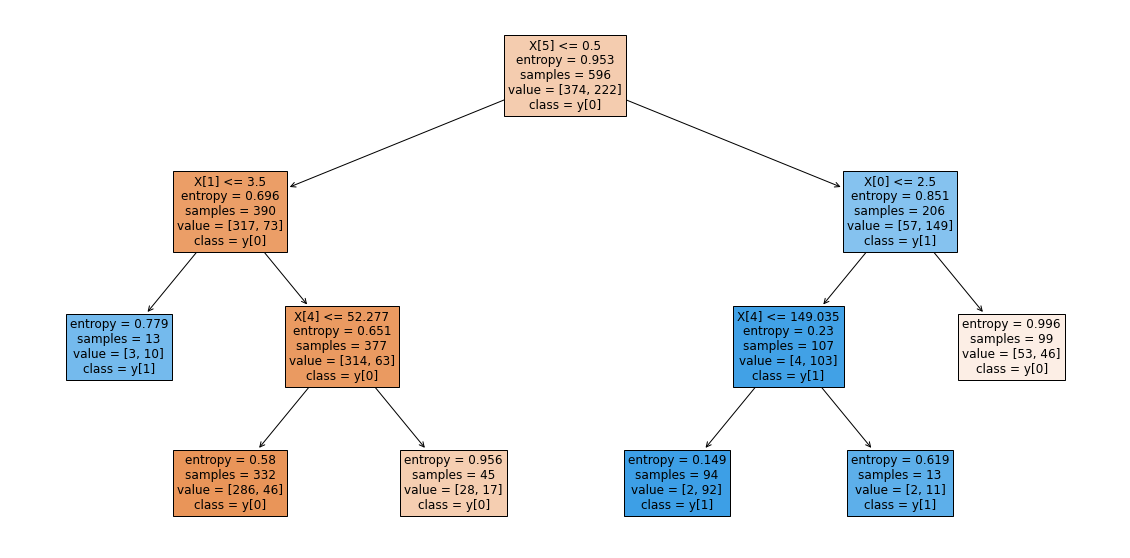

In [5]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, fontsize=12, class_names=True)
plt.show()

Найдём лучший классификатор используя диапазоны новых параметров.  
Для этого воспользуемся поиском с шагом.

In [6]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(), 
    param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 8), 'min_samples_split': range(2, 50, 10), 'min_samples_leaf': range(2, 20, 4)}, 
    cv=5)

gs.fit(X_train, y_train)
print('best_params:', gs.best_params_)
print('best_score:', gs.best_score_)
print('test_score:', gs.best_estimator_.score(X_test, y_test))

best_params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 14, 'min_samples_split': 42}
best_score: 0.8137955182072828
test_score: 0.7966101694915254


Сузим набор параметров в диапазоне ранее найденных

In [7]:
gs = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(), 
    param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(3, 6), 'min_samples_split': range(30, 50), 'min_samples_leaf': range(10, 20)}, 
    cv=5)

gs.fit(X_train, y_train)
print('best_params:', gs.best_params_)
print('best_score:', gs.best_score_)
print('test_score:', gs.best_estimator_.score(X_test, y_test))

best_params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 13, 'min_samples_split': 37}
best_score: 0.8171708683473389
test_score: 0.7932203389830509
